Постановка задачи классификации
Классификация — один из разделов машинного обучения, посвященный решению следующей задачи. Имеется множество объектов (ситуаций), разделённых некоторым образом на классы. Задано конечное множество объектов, для которых известно, к каким классам они относятся. Это множество называется обучающей выборкой. Классовая принадлежность остальных объектов не известна. Требуется построить алгоритм, способный классифицировать произвольный объект из исходного множества.
Классифицировать объект — значит, указать номер (или наименование класса), к которому относится данный объект.

Классификация объекта — номер или наименование класса, выдаваемый алгоритмом классификации в результате его применения к данному конкретному объекту.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D

Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве.

Расстояние Евклида между a1 и a2: 3.742
Квадрат Евклидова расстояния между a2 и a3: 78.0
Расстояние Чебышева между a3 и a4: 3.0
Расстояние Хемминга между a2 и a4: 5.0


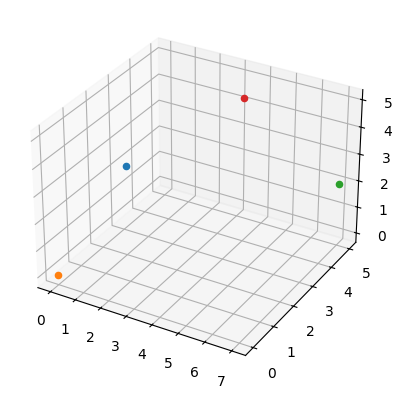

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

a = np.array([[1, 2, 3], [0, 0, 0], [7, 5, 2], [4, 4, 5]])

print('Расстояние Евклида между a1 и a2:', (np.linalg.norm(a[0] - a[1]).round(3)))
print('Квадрат Евклидова расстояния между a2 и a3:', ((np.linalg.norm(a[1] - a[2]) ** 2).round(3)))
print('Расстояние Чебышева между a3 и a4:', (np.linalg.norm(a[2] - a[3], ord=np.inf)))
print('Расстояние Хемминга между a2 и a4:', (np.linalg.norm(a[1] - a[3], ord=np.inf)))

for i in range(0,4):
    ax.scatter(a[i, 0], a[i, 1], a[i, 2])

plt.show()

добавить примеры

Для предыдущего примера поэкспериментируйте с параметрами классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте результаты.